### Imports

In [1]:
from utils.utils import *

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import sys

/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ealvarez/miniconda3/envs/Conda_dgl_3.10/li

### Parameters

In [40]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

exp = params["exp"]
print("Exp:\t\t", exp)

methods = ["vgae", "vgae"]
print("Methods:\t", methods)

groups = ["WT", "pck1^",]
print("Groups:\t\t", groups)

options = ["", ""]
print("Options:\t", options)

Exp:		 exp2
Methods:	 ['vgae', 'vgae']
Groups:		 ['WT', 'pck1^']
Options:	 ['', '']


In [41]:
def sort_edges(df_edges):
    s = []
    t = []
    for row in df_edges.itertuples():
        if row[1] > row[2]:
            s.append(row[2])
            t.append(row[1])
        else:
            s.append(row[1])
            t.append(row[2])
    df_edges["source"] = s
    df_edges["target"] = t

### Changes detection

#### Read edges

In [43]:
list_graphs = []
for k in range(len(groups)):
    df_edges = pd.read_csv("output/{}/common_edges/common_edges_{}_{}_{}.csv".format(exp, methods[k], groups[k], options[k]),
                            dtype={"source": "string", "target": "string"})
    sort_edges(df_edges)
    df_edges.rename(columns={"weight": "weight{}".format(k + 1)}, inplace=True)
    G = nx.from_pandas_edgelist(df_edges, edge_attr=["weight{}".format(k + 1)])
    
    list_graphs.append(G)

#### Compose

In [44]:
R = nx.compose(list_graphs[0], list_graphs[1])

labels = []
for edge in R.edges():
    weights = R.get_edge_data(*edge)
    label = get_label(weights)
    labels.append(label)
labels

nx.set_edge_attributes(R, {(u, v): {"change": get_label(ed, th=0.8)} for u, v, ed in R.edges.data()})

In [45]:
df_change = nx.to_pandas_edgelist(R)
df_change = df_change[["source", "target", "weight1", "weight2", "change"]]
df_change

,source,target,weight1,weight2,change
0,109.0407,114.056,0.710154,NaN,p?
1,109.0407,127.0513,0.830812,NaN,P?
2,109.0407,131.0462,0.775306,NaN,p?
3,109.0407,132.086,0.751123,NaN,p?
4,109.0407,135.0311,0.826961,NaN,P?
...,...,...,...,...,...
463634,927.542,927.4755,NaN,0.741351,?p
463635,869.2369,869.2502,NaN,0.845228,?P
463636,869.2369,869.2728,NaN,0.710365,?p
463637,978.3602,978.3779,NaN,0.676124,?p


In [19]:
df_change = nx.to_pandas_edgelist(R)
df_change = df_change[["source", "target" "weight1", "weight2", "change"]]
df_change

,source,target,weight2,change,weight1
0,109.0407,114.056,NaN,p?,0.710154
1,109.0407,127.0513,NaN,P?,0.830812
2,109.0407,131.0462,NaN,p?,0.775306
3,109.0407,132.086,NaN,p?,0.751123
4,109.0407,135.0311,NaN,P?,0.826961
...,...,...,...,...,...
463634,927.542,927.4755,0.741351,?p,NaN
463635,869.2369,869.2502,0.845228,?P,NaN
463636,869.2369,869.2728,0.710365,?p,NaN
463637,978.3602,978.3779,0.676124,?p,NaN


In [80]:
df_change[(df_change["weight1"].notnull()) & (df_change["weight2"].notnull())].iloc[50:60]
# df_change[df_change["change"] == "Nn"]

,source,target,weight1,weight2,change
2424,144.0458,608.121,0.768117,0.656511,pp
2426,144.0458,628.0561,0.779379,0.783229,pp
2430,144.0458,645.0333,0.678041,0.790898,pp
2433,144.0458,719.0589,0.689521,0.769412,pp
2650,145.0617,160.0617,0.878801,0.900053,PP
2651,145.0617,173.0711,0.719190,0.770071,pp
2653,145.0617,188.0264,0.655519,0.929160,pP
2658,145.0617,251.0481,0.676203,0.594429,pp
2663,145.0617,297.1053,0.702790,0.780049,pp
2666,145.0617,408.012,0.713688,0.788336,pp


### Query

In [14]:
H = nx.from_pandas_edgelist(df_change, "source", "target", edge_attr=["change"], create_using=nx.DiGraph())
# H.edges(data=True)

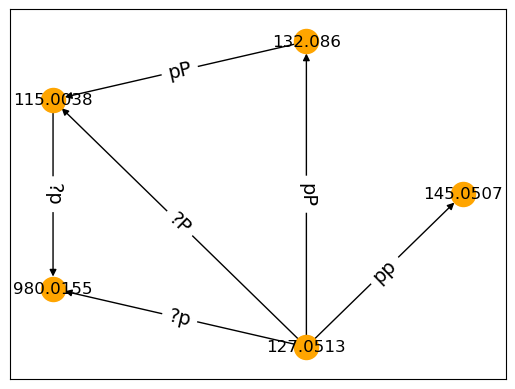

In [74]:
HF = H.subgraph(["127.0513", "132.086", "145.0507", "980.0155", "132.086", "115.0038"])
edge_labels = nx.get_edge_attributes(HF, "change")

pos = pos=nx.circular_layout(HF)
nx.draw_networkx(HF, pos, font_color="black", font_size=12, node_color="orange")
nx.draw_networkx_edge_labels(H, pos, edge_labels, font_size=14)

# plt.title("{}: {} --> {}".format(method, group1[0], group2[0]))
plt.show()

### BioCyc

#### Load metadata

In [86]:
# Load dataset
df_metadata = pd.read_excel("{}/input/Edwin_proyecto2/Edwin_Set2-processed.xlsx".format(dir), header=0, sheet_name=1)
print(df_metadata.shape)
df_metadata

(189, 8)


,Corrected (m/z),Metabolites - Approved by Nicola,Metabolites - Used by Florian,Theoretical - m/z (based on BioCyc),Chemical Formula (based on BioCyc),Adduct (negative mode),Error in mDa (oTOF),Error in PPM (Theoretical vs Corrected)
0,59.0137,Acetic acid,*,59.013568,C2H4O2,H,NaN,NaN
1,NaN,Acrylamide,*,70.029552,C3H5NO,H,NaN,NaN
2,71.0139,Acrylic acid,*,71.013568,C3H4O2,H,NaN,NaN
3,NaN,Tetrahydrophurane,*,71.049953,C4H8O,H,NaN,NaN
4,NaN,Propionic acid,*,73.029218,C3H6O2,H,NaN,NaN
...,...,...,...,...,...,...,...,...
184,NaN,C20H27N10O16P3,*,755.074660,C20H27N10O16P3,H,NaN,NaN
185,766.1076,Coenzyme A,*,766.107647,C21H36N7O16P3S,H,NaN,NaN
186,784.1495,FAD,*,784.149573,C27H33N9O15P2,H,NaN,NaN
187,808.1180,Acetyl coenzyme A,*,808.118211,C23H38N7O17P3S,H,NaN,NaN


In [87]:
df_metadata.dropna(subset=["Corrected (m/z)"], inplace=True)
df_metadata

,Corrected (m/z),Metabolites - Approved by Nicola,Metabolites - Used by Florian,Theoretical - m/z (based on BioCyc),Chemical Formula (based on BioCyc),Adduct (negative mode),Error in mDa (oTOF),Error in PPM (Theoretical vs Corrected)
0,59.0137,Acetic acid,*,59.013568,C2H4O2,H,NaN,NaN
2,71.0139,Acrylic acid,*,71.013568,C3H4O2,H,NaN,NaN
5,74.0249,Glycine,*,74.024467,C2H5NO2,H,NaN,NaN
6,85.0296,Methyl Acrylate,*,85.029218,C4H6O2,H,NaN,NaN
7,87.0086,Pyruvic acid,*,87.008482,C3H4O3,H,NaN,NaN
...,...,...,...,...,...,...,...,...
181,664.1170,Nicotinamide adenine dinucleotide,*,664.117210,C21H29N7O14P2,H,NaN,NaN
182,665.2139,C33H36N6O7 + K,*,665.214297,C24H42O21,H,NaN,NaN
185,766.1076,Coenzyme A,*,766.107647,C21H36N7O16P3S,H,NaN,NaN
186,784.1495,FAD,*,784.149573,C27H33N9O15P2,H,NaN,NaN


In [88]:
df_metadata.set_index("Corrected (m/z)", inplace=True)
df_metadata

,Metabolites - Approved by Nicola,Metabolites - Used by Florian,Theoretical - m/z (based on BioCyc),Chemical Formula (based on BioCyc),Adduct (negative mode),Error in mDa (oTOF),Error in PPM (Theoretical vs Corrected)
Corrected (m/z),,,,,,,
59.0137,Acetic acid,*,59.013568,C2H4O2,H,NaN,NaN
71.0139,Acrylic acid,*,71.013568,C3H4O2,H,NaN,NaN
74.0249,Glycine,*,74.024467,C2H5NO2,H,NaN,NaN
85.0296,Methyl Acrylate,*,85.029218,C4H6O2,H,NaN,NaN
87.0086,Pyruvic acid,*,87.008482,C3H4O3,H,NaN,NaN
...,...,...,...,...,...,...,...
664.1170,Nicotinamide adenine dinucleotide,*,664.117210,C21H29N7O14P2,H,NaN,NaN
665.2139,C33H36N6O7 + K,*,665.214297,C24H42O21,H,NaN,NaN
766.1076,Coenzyme A,*,766.107647,C21H36N7O16P3S,H,NaN,NaN


In [90]:
# List of nodes
list_nodes_subgraphs = df_metadata.index.values
print(len(list_nodes_subgraphs))
list_nodes_subgraphs

85


array([ 59.0137,  71.0139,  74.0249,  85.0296,  87.0086,  88.0405,
        89.0245, 101.0243, 102.0562, 109.0407, 112.0518, 113.0246,
       115.0038, 117.0195, 118.051 , 118.9807, 122.0247, 128.0355,
       129.0192, 130.0506, 130.0875, 131.0355, 131.0824, 132.0303,
       133.014 , 135.0311, 145.0144, 145.0617, 145.0984, 146.0458,
       147.0297, 147.0655, 151.0403, 152.0354, 153.0173, 154.062 ,
       165.0554, 166.0506, 166.9758, 168.0663, 171.0302, 173.0095,
       173.0454, 173.0711, 179.0348, 179.0561, 184.0021, 186.1139,
       211.0603, 213.0145, 218.1033, 225.0991, 237.0282, 249.0552,
       251.0776, 259.0227, 266.0886, 279.2331, 307.0311, 316.2857,
       317.2143, 323.0277, 338.9889, 346.0558, 347.0589, 362.0509,
       365.0531, 367.0185, 388.9441, 397.1319, 401.0173, 426.0221,
       441.3372, 489.9937, 505.9889, 521.984 , 545.3994, 604.0696,
       606.0744, 611.144 , 664.117 , 665.2139, 766.1076, 784.1495,
       808.118 ])

#### Load process data

In [91]:
df_subgraphs = pd.read_csv("{}/output_changes/subgraphs/{}_{}_subgraphs_{}_{}.csv".format(dir, group1[0], group2[0], dimension, "L2"))
print(group1[0], "-", group2[0])
df_subgraphs

WT - zwf1^


,source,target,weight1,weight2,difference,change
0,157.0621,423.1112,0.776478,0.800683,0.024204,pP
1,729.5255,887.4687,0.771786,0.656784,0.115002,pp
2,646.4528,689.4951,0.949762,0.951424,0.001662,PP
3,690.4982,880.5298,0.825929,0.834769,0.008840,PP
4,703.5109,950.4899,0.835806,0.729033,0.106773,Pp
...,...,...,...,...,...,...
240657,412.9673,933.5053,NaN,0.711720,NaN,?p
240658,254.9783,816.5741,NaN,0.637673,NaN,?p
240659,244.1304,808.1180,NaN,0.671185,NaN,?p
240660,426.0221,513.1053,NaN,0.777109,NaN,?p


In [94]:
# count of kind chane
type_changes = df_subgraphs["change"].value_counts()
type_changes.to_frame()

,count
change,
?p,149518
?P,59827
p?,12942
P?,9113
PP,3437
pp,2349
pP,2229
Pp,1247


#### Get metabolite name

In [98]:
# list_nodes_subgraphs_filter = np.unique(np.concatenate((df_subgraphs["source"].values, df_subgraphs["target"].values)))
list_nodes_subgraphs_filter = [59.0137,  71.0139,  74.0249,  85.0296,  87.0086,  88.0405, 89.0245, 101.0243, 102.0562, 109.0407, 112.0518, 113.0246]
list_nodes_subgraphs_filter

[59.0137,
 71.0139,
 74.0249,
 85.0296,
 87.0086,
 88.0405,
 89.0245,
 101.0243,
 102.0562,
 109.0407,
 112.0518,
 113.0246]

In [99]:
list_metabolite = df_metadata.loc[list_nodes_subgraphs_filter, ["Metabolites - Approved by Nicola", "Chemical Formula (based on BioCyc)"]]
list_metabolite

,Metabolites - Approved by Nicola,Chemical Formula (based on BioCyc)
Corrected (m/z),,
59.0137,Acetic acid,C2H4O2
71.0139,Acrylic acid,C3H4O2
74.0249,Glycine,C2H5NO2
85.0296,Methyl Acrylate,C4H6O2
87.0086,Pyruvic acid,C3H4O3
88.0405,Alanine,C3H7NO2
89.0245,Lactic acid / Glyceraldehyde,C3H6O3
101.0243,Acetoacetic acid,C4H6O3
102.0562,Amino-butyric acid,C4H9NO2


In [ ]:
# Get formula by node id into clusters and save one by one
df_metabolite = pd.DataFrame()
for k in range(len(clusters_k.sizes())):
  # before = df_raw1.loc[clusters_k.subgraph(k).vs["name"]].mean(axis=1).values
  # after = df_raw2.loc[clusters_k.subgraph(k).vs["name"]].mean(axis=1).values

  before = df_process1[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values
  after = df_process2[clusters_k.subgraph(k).vs["name"]].mean(axis=0).values

  df_cluster_formula = pd.DataFrame({# "Alignment": clusters_k.subgraph(k).vs["name"],
                                     # "INCHIKEY": list_metabolite_formula["INCHIKEY"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     # "Formula": list_metabolite_formula["Chemical Formula (based on BioCyc)"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Metabolities": list_metabolite_formula["Metabolites - Approved by Nicola"].loc[clusters_k.subgraph(k).vs["name"]].values,
                                     "Before": np.log10(before),
                                     "After": np.log10(after),
                                     "Ratio": np.log10(np.divide(after, before))})
  df_metabolite = pd.concat([df_metabolite, df_cluster_formula])
  # Save
  df_cluster_formula.to_csv("outputs/clusters/metabolite/df_biocyc_full_cluster{}_metabolities_ratio_{}_{}_{}_{}.csv".format(k + 1, G1_name, G2_name, threshold1, threshold3), index=None, sep="\t")
  print(df_cluster_formula)
  print()

df_metabolite.to_csv("outputs/clusters/metabolite/df_biocyc_full_metabolities_ratio_{}_{}_{}_{}.csv".format(G1_name, G2_name, threshold1, threshold3), index=None, sep="\t")